In [ ]:
#CNN FOR FASHION MNIST

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten

In [3]:
(X_train,y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0   #normalizing the data to be in range of 0 and 1

In [4]:
num_classes = 10
y_train = to_categorical(y_train, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)   #one hot encoding

In [5]:
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape{y_test.shape}")   #printing the shape of a data

X_train.shape: (60000, 28, 28), y_train.shape: (60000, 10)
X_test.shape: (10000, 28, 28), y_test.shape(10000, 10)


In [6]:
input_shape = (28,28)
inputs = Input(shape=(input_shape))   #defining input shape

In [8]:
x = Flatten()(inputs)   #flatten the inputs

In [9]:
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)   #added the iinput layers

In [10]:
outputs = Dense(num_classes, activation='softmax')(x)  #added the output layer with 10  classes

In [11]:
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   #compiled the model

In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7768 - loss: 0.6297 - val_accuracy: 0.8511 - val_loss: 0.4130
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8641 - loss: 0.3731 - val_accuracy: 0.8627 - val_loss: 0.3798
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8758 - loss: 0.3313 - val_accuracy: 0.8705 - val_loss: 0.3629
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8872 - loss: 0.3023 - val_accuracy: 0.8662 - val_loss: 0.3610
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8890 - loss: 0.2948 - val_accuracy: 0.8767 - val_loss: 0.3436
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8959 - loss: 0.2799 - val_accuracy: 0.8788 - val_loss: 0.3379
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9013 - loss: 0.2653 - val_accuracy: 0.8708 - val_loss: 0.3644
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9052 - loss: 0.2541 -

In [14]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy:{test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8792 - loss: 0.3469
Test loss: 0.34244075417518616
Test accuracy:0.8804000020027161


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Predicted class: Shirt
Actual class: Shirt


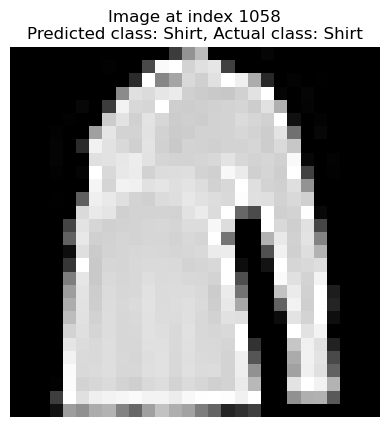

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the image at the specified index
sample_idx = 1058
sample_input = np.expand_dims(X_test[sample_idx], axis=0)  # Expand dimensions for single sample
predictions = model.predict(sample_input)
predicted_class_idx = np.argmax(predictions)
predicted_class = class_names[predicted_class_idx]
actual_class_idx = np.argmax(y_test[sample_idx])
actual_class = class_names[actual_class_idx]

print(f'Predicted class: {predicted_class}')
print(f'Actual class: {actual_class}')

# Display the image at the specified index
plt.imshow(X_test[sample_idx], cmap='gray')
plt.title(f'Image at index {sample_idx}\nPredicted class: {predicted_class}, Actual class: {actual_class}')
plt.axis('off')  # Hide axes
plt.show()